# Tensorflow

Entrenando un modelo para predecir imagenes

In [1]:
import tensorflow as tf

tf.__version__

'2.9.1'

Se importa un conjunto de datos que consta de imagenes tamaño 28 x 28

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Ejemplo de uno de los tensores que se utilizara
para entrenar el modelo

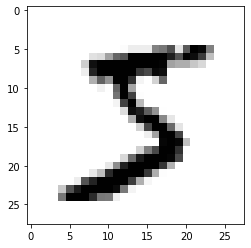

In [4]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show()

A continuacion se observan los arrays y sus respectivos valores de escala entre blanco y negro para las primeras 8 filas de 28

In [5]:
print('Tamaño: ',x_train[0].shape)
print('Tensor: ')
x_train[0][0:8]

Tamaño:  (28, 28)
Tensor: 


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

Construccion del modelo

In [6]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

model = tf.keras.models.Sequential()
# Se adicionan dos capas ocultas
model.add(tf.keras.layers.Flatten())
# Se agregan 128 neuronas a la capa con una funcion de activacion llamada relu predeterminada de keras
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
# Se utiliza softmax para la funcion de activacion
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))

# Las redes neuronales siempre estan tratando de minimizar las perdidas

model.compile(optimizer = 'adam',
              loss      = 'sparse_categorical_crossentropy',
              metrics   = ['accuracy'])

# utilizamos 3 epocas

historial = model.fit(x_train,
                      y_train,
                      epochs = 8)

Epoch 1/8
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7716 - accuracy: 0.8784
Epoch 2/8
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3405 - accuracy: 0.9302
Epoch 3/8
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2027 - accuracy: 0.9474
Epoch 4/8
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1589 - accuracy: 0.9559
Epoch 5/8
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1489 - accuracy: 0.9586
Epoch 6/8
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1298 - accuracy: 0.9651
Epoch 7/8
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1200 - accuracy: 0.9666
Epoch 8/8
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1106 - accuracy: 0.9703


Podemos observar que a partir de la tercer iteración la perdida tiende a estabilizarse y el accuracy llega a un maximo en la sexta

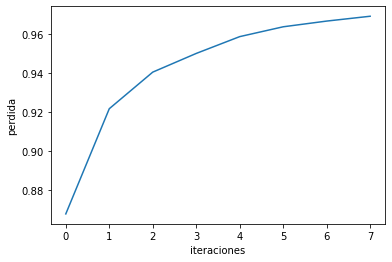

In [62]:
plt.xlabel('iteraciones')
plt.ylabel('perdida')
plt.plot(historial.history['accuracy']);

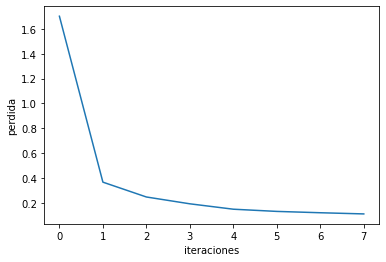

In [63]:
plt.xlabel('iteraciones')
plt.ylabel('perdida')
plt.plot(historial.history['loss']);

In [8]:
prediccion = model.predict([x_test])

313/313 [==============================] - 1s 2ms/step


A simple vista se puede visualizar que el primer array es un 7

In [9]:
from termcolor import colored

longitud = x_train[0].shape[0]
x_test   = tf.keras.utils.normalize(x_test, axis = 1)
for i in range(longitud):
    array = x_test[0][i]
    array = [1 if  i > 0 else 0 for i in array]
    #print(' '.join(str(e) for e in array))
    print(' '.join(colored(e, 'red') if e == 1 else colored(e, 'blue') for e in array))

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0
0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 

Prediccion de la imagen

            Prediccion:  7


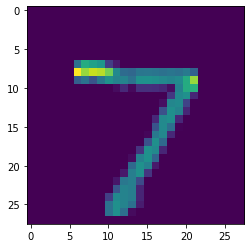

            Prediccion:  2


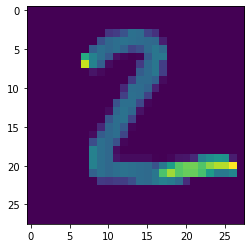

            Prediccion:  1


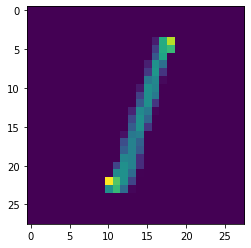

In [54]:
import numpy as np

for i in range(0, 3):
    # Argmax retorna el indice del numero mas grande en el array
    imagen = np.argmax(prediccion[i])
    print('            Prediccion: ',imagen)
    plt.imshow(x_test[i])
    plt.show()

Con datos Escalados:

In [55]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

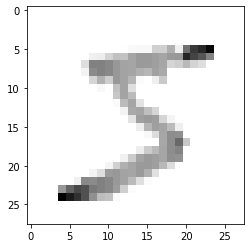

In [56]:
plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show()

In [57]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))

model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))


model.compile(optimizer = 'adam',
              loss      = 'sparse_categorical_crossentropy',
              metrics   = ['accuracy'])

historial = model.fit(x_train,
                  y_train,
                  epochs = 15)

Epoch 1/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2595 - accuracy: 0.9225
Epoch 2/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1032 - accuracy: 0.9682
Epoch 3/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0703 - accuracy: 0.9784
Epoch 4/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0531 - accuracy: 0.9832
Epoch 5/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0403 - accuracy: 0.9865
Epoch 6/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0317 - accuracy: 0.9894
Epoch 7/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0251 - accuracy: 0.9913
Epoch 8/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0207 - accuracy: 0.9933
Epoch 9/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0179 - accuracy: 0.9940
Epoch 10/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.015

Podemos observar que a partir de la iteracion numero 10 la perdida tiende a estabilizarse

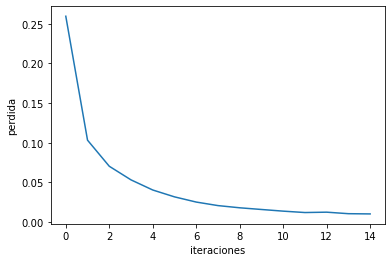

In [58]:
plt.xlabel('iteraciones')
plt.ylabel('perdida')
plt.plot(historial.history['loss'])

            Prediccion:  7


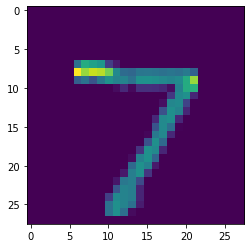

            Prediccion:  2


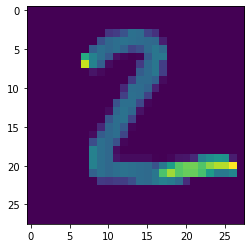

            Prediccion:  1


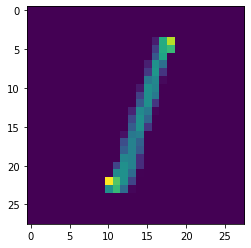

In [12]:
import numpy as np

for i in range(0, 3):
    # Argmax retorna el indice del numero mas grande en el array
    imagen = np.argmax(prediccion[i])
    print('            Prediccion: ',imagen)
    plt.imshow(x_test[i])
    plt.show()